In [1]:
import math
from bprH import bprH, adv_index, save_model, load_model
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
import cProfile as profile

%load_ext autoreload
%autoreload 2

In [2]:
def behavior_generator(num_user = 10, num_item=10):
    data = []
    for u in range(num_user):
        for i in range(num_item):
            p = np.random.uniform(0,1)
            if 0.7 <= p:
                data.append(['U' + str(u),'I' + str(i),'P'])
                data.append(['U' + str(u),'I' + str(i),'V'])
            elif 0.3 <= p:
                data.append(['U' + str(u),'I' + str(i),'V'])
    data = pd.DataFrame(data, columns=['UserID', 'ItemID', 'Action'])
    return data

In [3]:
data = behavior_generator(num_user=20, num_item=20)

In [4]:
# the best way is to split the data with a time manner - from sklearn.model_selection import TimeSeriesSplit
# but first let's do it in a simple way

original_item_list = sorted(set(data.ItemID))
original_user_list = sorted(set(data.UserID))

data_without_target = data[data.Action != 'P']
data_only_with_target = data[data.Action == 'P']

In [5]:
# split the data_only_with_target into 5 folds
kf = KFold(n_splits=2,shuffle=True, random_state=0)
kf.get_n_splits(X=data_only_with_target)

2

In [8]:
#pr = profile.Profile()
#pr.disable()

KeyboardInterrupt: 

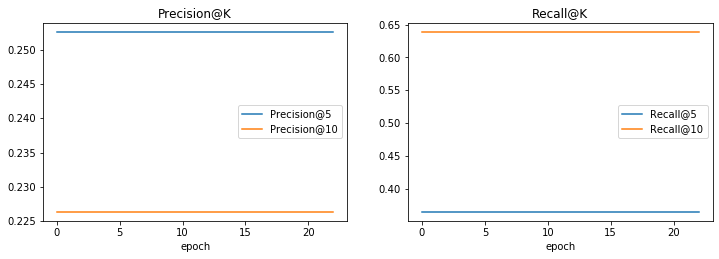

In [6]:
#pr.enable()
cnt = 0
for train_index, test_index in kf.split(X=data_only_with_target):
    # build train and test data
    # page 90 5.2 section - make most of auxiliary data in training process
    train_data = pd.concat([data_only_with_target.iloc[train_index], data_without_target])
    test_data = data_only_with_target.iloc[test_index]

    # start a BPRH model
    model = bprH(dim=5, omega=8, rho=1, lambda_u=1, lambda_v=0.5, lambda_b=0.5, gamma=0.01, random_state=20200704, num_iter=500)

    model.fit(X=train_data, eval_X=test_data, original_item_list=original_item_list, original_user_list=original_user_list,
              saved_path='data/item-set-coselection-'+str(cnt)+'.pkl', coselection=True, plot_metric=True)
    cnt += 1

#pr.dump_stats('profile.pstat')

In [12]:
# read sobazaar data
data = pd.read_csv('data/sb_unique_actions_20.csv')
# change column name
data.columns = ['ItemID', 'UserID', 'Action', 'Action_Date', 'Action_Time',
       'SessionID']

# data = data.sample(frac=0.5) # TODO: test small data

In [13]:
# the best way is to split the data with a time manner - from sklearn.model_selection import TimeSeriesSplit
# but first let's do it in a simple way

original_item_list = sorted(set(data.ItemID))
original_user_list = sorted(set(data.UserID))

data_without_target = data[data.Action != 'P']
data_only_with_target = data[data.Action == 'P']

In [14]:
# split the data_only_with_target into 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X=data_only_with_target)

5

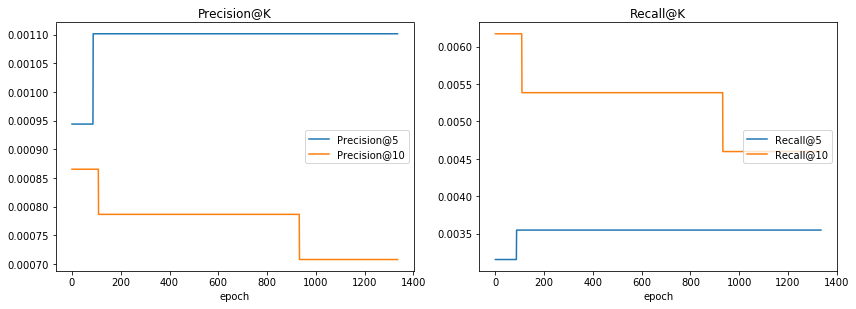

Precision@K
	Precision@5      	 (min:    0.001, max:    0.001, cur:    0.001)
	Precision@10     	 (min:    0.001, max:    0.001, cur:    0.001)
Recall@K
	Recall@5         	 (min:    0.003, max:    0.004, cur:    0.004)
	Recall@10        	 (min:    0.005, max:    0.006, cur:    0.005)


 13%|█▎        | 1336/10000 [8:42:02<60:05:13, 24.97s/it, loss=-17.4, norm_nabula_U_u=13.5, norm_nabula_Vi=5.07, norm_nabula_Vj=6.85, norm_nabula_Vk=6.98, precision_10=0.000708, precision_5=0.0011, recall_10=0.0046, recall_5=0.00355]

In [ ]:
cnt = 0
for train_index, test_index in kf.split(X=data_only_with_target):
    # build train and test data
    train_data = pd.concat([data_only_with_target.iloc[train_index], data_without_target])
    test_data = data_only_with_target.iloc[test_index]

    # start a BPRH model
    model = bprH(dim=30, omega=1000, rho=1, lambda_u=1, lambda_v=0.5, lambda_b=0.5, gamma=0.01, random_state=20200704, num_iter=10000)

    model.fit(X=train_data, eval_X=test_data, original_item_list=original_item_list, original_user_list=original_user_list,
              saved_path='data/item-set-coselection-'+str(cnt)+'.pkl', coselection=True, plot_metric=True)
    cnt += 1

In [ ]:
train_data = pd.concat([data_only_with_target.iloc[train_index], data_without_target])
test_data = data_only_with_target.iloc[test_index]

In [ ]:
# start a BPRH model
model = bprH(dim=50, omega=1000, rho=1, lambda_u=0.1, lambda_v=0.1, lambda_b=0.1, gamma=0.001, random_state=20200704)

model.fit(X=train_data, original_item_list=original_item_list, original_user_list=original_user_list, num_iter=10000, saved_path='data/item-set-coselection-'+str(cnt)+'.pkl')
cnt += 1

In [ ]:
user_to_predict = sorted(set(test_data.UserID))

In [ ]:
model = load_model(load_path='bprH_model.pkl')

In [ ]:
model.scoring(ground_truth=test_data, K=5)